In [1]:
#import packages
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import feature_selection as f_select
import os.path
import warnings
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from scipy import stats, integrate
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from pydoc import help
from scipy.stats.stats import pearsonr

In [2]:
#Retrieve dataset
df=(r'C:\Users\abrah\OneDrive\Desktop\Data Science projects\Vehicles\CarsFinal.csv')
pd.read_csv(df)
cars=pd.read_csv(df)

In [3]:
#Building a model using the most relevant attributes based on Pearson Correlation Attributes

In [4]:
df2 = cars[['price','wheelbase', 'carlength', 'carwidth','curbweight','enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',]]
df2.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,19,26
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,24,30
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,18,22


In [5]:
#Seperate dataset into Training and Testing sets

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y = df2['price']
X = df2.drop(['price'], axis = 1)

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)

X_test = scaler.transform(X_test_org)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

C:\Users\abrah\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


X_train shape:  (153, 9)
y_train shape:  (153,)
X_test shape:  (52, 9)
y_test shape:  (52,)


In [7]:
#Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


lreg = LinearRegression()
lreg.fit(X_train, y_train)
print("R2 Training Score: ", lreg.score(X_train, y_train))
print("R2 Testing Score: ", lreg.score(X_test, y_test))

R2 Training Score:  0.8200348030366353
R2 Testing Score:  0.8143882279378505


In [9]:
print(lreg.intercept_)

754.7868212943777


In [10]:
#Linear Regression Prediction

In [46]:
test_predict = lreg.predict(X_test)
test_predict = pd.DataFrame(test_predict,columns=['Predicted_Price'])
test_predict['Predicted_Price'] = round(test_predict['Predicted_Price'],2)

y_test_index = y_test.reset_index()
y_test_index = y_test_index.drop(columns='index', axis = 1)
test_predict = pd.concat([y_test_index, test_predict], axis = 1)
test_predict.head(15)

,price,Predicted_Price
0,6795.0,6267.77
1,15750.0,20296.39
2,15250.0,13973.59
3,5151.0,189.77
4,9995.0,10730.99
5,11199.0,15354.51
6,5389.0,6235.24
7,7898.0,5819.94
8,17199.0,23381.27
9,6529.0,6764.46


C:\Users\abrah\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


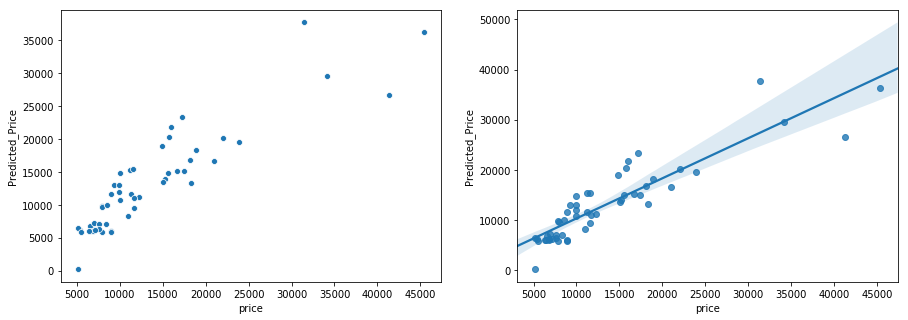

In [47]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x="price", y="Predicted_Price", data=test_predict)

plt.subplot(1,2,2)
sns.regplot(x="price", y="Predicted_Price", data=test_predict)
plt.show()

In [12]:
#Lasso Regression

In [13]:
from  sklearn.linear_model import Lasso


alpha_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in alpha_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [14]:
#Compare alpha values

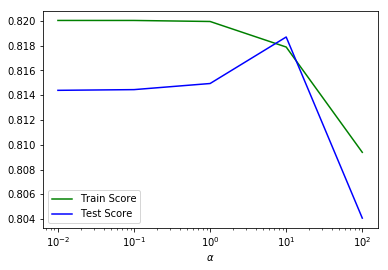

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(alpha_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(alpha_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.show()

In [16]:
#alpha value 10 will be used

In [17]:
lasso = Lasso(10)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.8178890266201894
0.8186981945145447


In [18]:
#Lasso Regression Prediction

      price  Predicted_Price
0    6795.0          5999.48
1   15750.0         20404.09
2   15250.0         14151.12
3    5151.0          -304.56
4    9995.0         10810.54
5   11199.0         15328.70
6    5389.0          6275.48
7    7898.0          6183.50
8   17199.0         22803.74
9    6529.0          6566.71
10  20970.0         16457.91
11  31400.5         35538.07
12  10945.0          8420.62
13  18344.0         12270.31
14   8916.5          5809.87


C:\Users\abrah\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


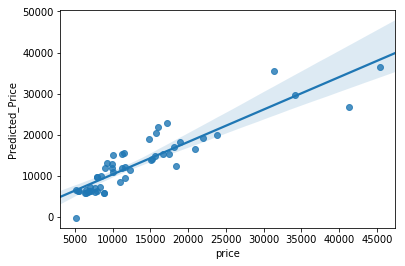

In [19]:
test_predict = lasso.predict(X_test)
test_predict = pd.DataFrame(test_predict,columns=['Predicted_Price'])
test_predict['Predicted_Price'] = round(test_predict['Predicted_Price'],2)
y_test_index = y_test.reset_index()
y_test_index = y_test_index.drop(columns='index', axis = 1)
test_predict = pd.concat([y_test_index, test_predict], axis = 1)
print(test_predict.head(15))
sns.regplot(x="price", y="Predicted_Price", data=test_predict)

In [20]:
#Ridge Regression

In [34]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [22]:
#Compare alpha values

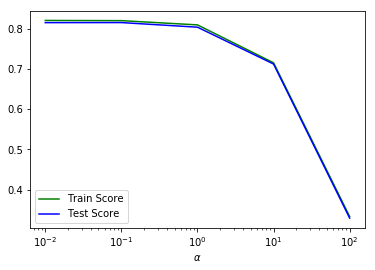

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.show()

In [25]:
#alpha value 1 will be used

In [26]:
#Ridge Regression Prediction

In [43]:
ridge = Ridge(1)
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.8089916345424747
0.8032809669247015


In [44]:
ridge = Ridge(1)
ridge.fit(X_train,y_train)
test_predict = ridge.predict(X_test)
test_predict = pd.DataFrame(test_predict,columns=['Predicted_Price'])
test_predict['Predicted_Price'] = round(test_predict['Predicted_Price'],2)
y_test_index = y_test.reset_index()
y_test_index = y_test_index.drop(columns='index', axis = 1)
test_predict = pd.concat([y_test_index, test_predict], axis = 1)
test_predict.head(15)

,price,Predicted_Price
0,6795.0,6002.65
1,15750.0,20085.84
2,15250.0,14218.31
3,5151.0,-962.18
4,9995.0,10901.94
5,11199.0,15090.52
6,5389.0,5917.32
7,7898.0,6833.66
8,17199.0,21975.95
9,6529.0,6511.34


C:\Users\abrah\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


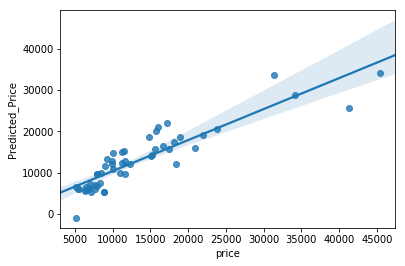

In [45]:
sns.regplot(x="price", y="Predicted_Price", data=test_predict)

In [48]:
#Conclusion

In [49]:
#It appears that the linear regression model has is the best predictive model with a training score of 0.820 and a testing score of 0.814. All 3 models seems to be pretty good although the Lasso and Ridge models created a random predictive negative value